In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('data/train_users_2.csv')
age_gender = pd.read_csv('data/age_gender_bkts.csv')
countries = pd.read_csv('data/countries.csv')
sess = pd.read_csv('data/sessions.csv')
test = pd.read_csv('data/test_users.csv')

In [3]:
print 'Train data shape', train.shape
print 'Age Gender shape', age_gender.shape
print 'Countries Shape', countries.shape
print 'Session Shape', sess.shape
print 'Test Shape', test.shape

Train data shape (213451, 16)
Age Gender shape (420, 5)
Countries Shape (10, 7)
Session Shape (10567737, 6)
Test Shape (62096, 15)


In [4]:
test.columns

Index([u'id', u'date_account_created', u'timestamp_first_active',
       u'date_first_booking', u'gender', u'age', u'signup_method',
       u'signup_flow', u'language', u'affiliate_channel',
       u'affiliate_provider', u'first_affiliate_tracked', u'signup_app',
       u'first_device_type', u'first_browser'],
      dtype='object')

PREPROCESSING DATA

In [5]:
train_test = pd.concat((train, test), axis=0, ignore_index=True)

In [6]:
train_test.shape

(275547, 16)

In [7]:
train_test = train_test.reindex_axis(train.columns, axis=1)

In [8]:
train_test['date_account_created']= pd.to_datetime(train_test['date_account_created'])

In [9]:
train_test['timestamp_first_active']=pd.to_datetime((train_test["timestamp_first_active"] // 1000000), format='%Y%m%d')

In [10]:
train_test['date_first_booking']= pd.to_datetime(train_test['date_first_booking'])

In [11]:
train_test.loc[train_test.age > 99, 'age'] = np.nan
train_test.loc[train_test.age < 18, 'age'] = np.nan

In [12]:
train_test.gender.replace('-unknown-', np.nan, inplace=True)

In [13]:
train_test.language.replace('-unknown-', np.nan, inplace=True)

In [14]:
train_test.first_browser.replace('-unknown-', np.nan, inplace=True)

In [15]:
def calc_date_features(df):
    #date_field = ["date_account_created","timestamp_first_active","date_first_booking"]
    #date_der = {}
    for row in ["month","year", "day", "dayofweek", "quarter"]:
        df["date_accnt_created_{0}".format(row)] = getattr(df["date_account_created"].dt, row).astype('int',raise_on_error=False)
        df["timestamp_first_active_{0}".format(row)] = getattr(df["timestamp_first_active"].dt, row).astype('int',raise_on_error=False)
        df["date_first_booking_{0}".format(row)] = getattr(df["date_first_booking"].dt, row).astype('int',raise_on_error=False)
    #return pd.DataFrame(df)

In [16]:
calc_date_features(train_test)

In [17]:
train_test.drop("date_account_created", axis=1, inplace=True)
train_test.drop("timestamp_first_active", axis=1, inplace=True)
train_test.drop("date_first_booking", axis=1, inplace=True)

In [18]:
train_test.shape

(275547, 28)

In [19]:
categorical_features = [
    'gender', 'signup_method', 'signup_flow', 'language',
    'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked',
    'signup_app', 'first_device_type', 'first_browser']

In [20]:
train_test = pd.get_dummies(train_test, columns=categorical_features)
train_test.shape

(275547, 168)

In [21]:
train_test.set_index('id', inplace=True)
test_final = train_test.loc[test['id']].drop('country_destination', axis=1)
train_final = train_test.loc[train['id']]
train_final = train_final.fillna(-1)

In [22]:
train_final.shape

(213451, 167)

In [23]:
test_final.shape

(62096, 166)

In [24]:
train_final.head()

,age,country_destination,date_accnt_created_month,timestamp_first_active_month,date_first_booking_month,date_accnt_created_year,timestamp_first_active_year,date_first_booking_year,date_accnt_created_day,timestamp_first_active_day,...,first_browser_Silk,first_browser_SiteKiosk,first_browser_SlimBrowser,first_browser_Sogou Explorer,first_browser_Stainless,first_browser_TenFourFox,first_browser_TheWorld Browser,first_browser_UC Browser,first_browser_Yandex.Browser,first_browser_wOSBrowser
id,,,,,,,,,,,,,,,,,,,,,
gxn3p5htnn,-1.0,NDF,6,3,-1.0,2010,2009,-1.0,28,19,...,0,0,0,0,0,0,0,0,0,0
820tgsjxq7,38.0,NDF,5,5,-1.0,2011,2009,-1.0,25,23,...,0,0,0,0,0,0,0,0,0,0
4ft3gnwmtx,56.0,US,9,6,8.0,2010,2009,2010.0,28,9,...,0,0,0,0,0,0,0,0,0,0
bjjt8pjhuk,42.0,other,12,10,9.0,2011,2009,2012.0,5,31,...,0,0,0,0,0,0,0,0,0,0
87mebub9p4,41.0,US,9,12,2.0,2010,2009,2010.0,14,8,...,0,0,0,0,0,0,0,0,0,0


In [25]:
test_final.head()

,age,date_accnt_created_month,timestamp_first_active_month,date_first_booking_month,date_accnt_created_year,timestamp_first_active_year,date_first_booking_year,date_accnt_created_day,timestamp_first_active_day,date_first_booking_day,...,first_browser_Silk,first_browser_SiteKiosk,first_browser_SlimBrowser,first_browser_Sogou Explorer,first_browser_Stainless,first_browser_TenFourFox,first_browser_TheWorld Browser,first_browser_UC Browser,first_browser_Yandex.Browser,first_browser_wOSBrowser
id,,,,,,,,,,,,,,,,,,,,,
5uwns89zht,35.0,7,7,NaN,2014,2014,NaN,1,1,NaN,...,0,0,0,0,0,0,0,0,0,0
jtl0dijy2j,NaN,7,7,NaN,2014,2014,NaN,1,1,NaN,...,0,0,0,0,0,0,0,0,0,0
xx0ulgorjt,NaN,7,7,NaN,2014,2014,NaN,1,1,NaN,...,0,0,0,0,0,0,0,0,0,0
6c6puo6ix0,NaN,7,7,NaN,2014,2014,NaN,1,1,NaN,...,0,0,0,0,0,0,0,0,0,0
czqhjk3yfe,NaN,7,7,NaN,2014,2014,NaN,1,1,NaN,...,0,0,0,0,0,0,0,0,0,0


In [26]:
test_final.reset_index(inplace=True)

In [27]:
test_final.head()

,id,age,date_accnt_created_month,timestamp_first_active_month,date_first_booking_month,date_accnt_created_year,timestamp_first_active_year,date_first_booking_year,date_accnt_created_day,timestamp_first_active_day,...,first_browser_Silk,first_browser_SiteKiosk,first_browser_SlimBrowser,first_browser_Sogou Explorer,first_browser_Stainless,first_browser_TenFourFox,first_browser_TheWorld Browser,first_browser_UC Browser,first_browser_Yandex.Browser,first_browser_wOSBrowser
0,5uwns89zht,35.0,7,7,NaN,2014,2014,NaN,1,1,...,0,0,0,0,0,0,0,0,0,0
1,jtl0dijy2j,NaN,7,7,NaN,2014,2014,NaN,1,1,...,0,0,0,0,0,0,0,0,0,0
2,xx0ulgorjt,NaN,7,7,NaN,2014,2014,NaN,1,1,...,0,0,0,0,0,0,0,0,0,0
3,6c6puo6ix0,NaN,7,7,NaN,2014,2014,NaN,1,1,...,0,0,0,0,0,0,0,0,0,0
4,czqhjk3yfe,NaN,7,7,NaN,2014,2014,NaN,1,1,...,0,0,0,0,0,0,0,0,0,0


In [28]:
test_final_wo_sess=test_final.drop('id', axis=1)

In [29]:
train_final.reset_index(inplace=True)

In [30]:
train_final_wo_sess=train_final.drop('id', axis=1)

In [31]:
test_final_wo_sess.head()

,age,date_accnt_created_month,timestamp_first_active_month,date_first_booking_month,date_accnt_created_year,timestamp_first_active_year,date_first_booking_year,date_accnt_created_day,timestamp_first_active_day,date_first_booking_day,...,first_browser_Silk,first_browser_SiteKiosk,first_browser_SlimBrowser,first_browser_Sogou Explorer,first_browser_Stainless,first_browser_TenFourFox,first_browser_TheWorld Browser,first_browser_UC Browser,first_browser_Yandex.Browser,first_browser_wOSBrowser
0,35.0,7,7,NaN,2014,2014,NaN,1,1,NaN,...,0,0,0,0,0,0,0,0,0,0
1,NaN,7,7,NaN,2014,2014,NaN,1,1,NaN,...,0,0,0,0,0,0,0,0,0,0
2,NaN,7,7,NaN,2014,2014,NaN,1,1,NaN,...,0,0,0,0,0,0,0,0,0,0
3,NaN,7,7,NaN,2014,2014,NaN,1,1,NaN,...,0,0,0,0,0,0,0,0,0,0
4,NaN,7,7,NaN,2014,2014,NaN,1,1,NaN,...,0,0,0,0,0,0,0,0,0,0


In [32]:
train_final_wo_sess.head()

,age,country_destination,date_accnt_created_month,timestamp_first_active_month,date_first_booking_month,date_accnt_created_year,timestamp_first_active_year,date_first_booking_year,date_accnt_created_day,timestamp_first_active_day,...,first_browser_Silk,first_browser_SiteKiosk,first_browser_SlimBrowser,first_browser_Sogou Explorer,first_browser_Stainless,first_browser_TenFourFox,first_browser_TheWorld Browser,first_browser_UC Browser,first_browser_Yandex.Browser,first_browser_wOSBrowser
0,-1.0,NDF,6,3,-1.0,2010,2009,-1.0,28,19,...,0,0,0,0,0,0,0,0,0,0
1,38.0,NDF,5,5,-1.0,2011,2009,-1.0,25,23,...,0,0,0,0,0,0,0,0,0,0
2,56.0,US,9,6,8.0,2010,2009,2010.0,28,9,...,0,0,0,0,0,0,0,0,0,0
3,42.0,other,12,10,9.0,2011,2009,2012.0,5,31,...,0,0,0,0,0,0,0,0,0,0
4,41.0,US,9,12,2.0,2010,2009,2010.0,14,8,...,0,0,0,0,0,0,0,0,0,0


In [33]:
train_final_wo_sess.shape

(213451, 167)

In [34]:
test_final_wo_sess.shape

(62096, 166)

In [35]:
test_final_wo_sess=test_final_wo_sess.fillna(-1)

SESSIONS

In [36]:
action_count = sess.groupby(['user_id', 'action'])['secs_elapsed'].agg(len).unstack()

In [37]:
action_type_count = sess.groupby(['user_id', 'action_type'])['secs_elapsed'].agg(len).unstack()
action_detail_count = sess.groupby(['user_id', 'action_detail'])['secs_elapsed'].agg(len).unstack()
device_type_sum = sess.groupby(['user_id', 'device_type'])['secs_elapsed'].agg(sum).unstack()

In [38]:
action_count = pd.DataFrame(action_count)

In [39]:
sessions_data = pd.concat([action_count, action_type_count, action_detail_count, device_type_sum],axis=1)

In [40]:
sessions_data.shape

(135483, 538)

In [41]:
sessions_data.columns = sessions_data.columns.map(lambda x: str(x) + '_count')

In [42]:
sessions_data.columns

Index([u'10_count', u'11_count', u'12_count', u'15_count', u'about_us_count',
       u'accept_decline_count', u'account_count',
       u'acculynk_bin_check_failed_count', u'acculynk_bin_check_success_count',
       u'acculynk_load_pin_pad_count',
       ...
       u'Chromebook_count', u'Linux Desktop_count', u'Mac Desktop_count',
       u'Opera Phone_count', u'Tablet_count', u'Windows Desktop_count',
       u'Windows Phone_count', u'iPad Tablet_count', u'iPhone_count',
       u'iPodtouch_count'],
      dtype='object', length=538)

In [43]:
sessions_data['most_used_device'] = sess.groupby('user_id')['device_type'].max()

In [44]:
train_test.reset_index(inplace=True)

In [45]:
train_test.shape

(275547, 168)

In [46]:
train_test_sess = train_test.join(sessions_data, on='id')

In [47]:
train_test_sess.head()

,id,age,country_destination,date_accnt_created_month,timestamp_first_active_month,date_first_booking_month,date_accnt_created_year,timestamp_first_active_year,date_first_booking_year,date_accnt_created_day,...,Linux Desktop_count,Mac Desktop_count,Opera Phone_count,Tablet_count,Windows Desktop_count,Windows Phone_count,iPad Tablet_count,iPhone_count,iPodtouch_count,most_used_device
0,gxn3p5htnn,NaN,NDF,6,3,NaN,2010,2009,NaN,28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,820tgsjxq7,38.0,NDF,5,5,NaN,2011,2009,NaN,25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4ft3gnwmtx,56.0,US,9,6,8.0,2010,2009,2010.0,28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,bjjt8pjhuk,42.0,other,12,10,9.0,2011,2009,2012.0,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,87mebub9p4,41.0,US,9,12,2.0,2010,2009,2010.0,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
train_test_sess.shape

(275547, 707)

In [49]:
train_test_sess.columns

Index([u'id', u'age', u'country_destination', u'date_accnt_created_month',
       u'timestamp_first_active_month', u'date_first_booking_month',
       u'date_accnt_created_year', u'timestamp_first_active_year',
       u'date_first_booking_year', u'date_accnt_created_day',
       ...
       u'Linux Desktop_count', u'Mac Desktop_count', u'Opera Phone_count',
       u'Tablet_count', u'Windows Desktop_count', u'Windows Phone_count',
       u'iPad Tablet_count', u'iPhone_count', u'iPodtouch_count',
       u'most_used_device'],
      dtype='object', length=707)

In [50]:
categorical_features1 = ['most_used_device']

In [51]:
train_test_sess.head()

,id,age,country_destination,date_accnt_created_month,timestamp_first_active_month,date_first_booking_month,date_accnt_created_year,timestamp_first_active_year,date_first_booking_year,date_accnt_created_day,...,Linux Desktop_count,Mac Desktop_count,Opera Phone_count,Tablet_count,Windows Desktop_count,Windows Phone_count,iPad Tablet_count,iPhone_count,iPodtouch_count,most_used_device
0,gxn3p5htnn,NaN,NDF,6,3,NaN,2010,2009,NaN,28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,820tgsjxq7,38.0,NDF,5,5,NaN,2011,2009,NaN,25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4ft3gnwmtx,56.0,US,9,6,8.0,2010,2009,2010.0,28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,bjjt8pjhuk,42.0,other,12,10,9.0,2011,2009,2012.0,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,87mebub9p4,41.0,US,9,12,2.0,2010,2009,2010.0,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
train_test_sess = pd.get_dummies(train_test_sess, columns=categorical_features1)

In [53]:
train_test_sess.shape

(275547, 720)

In [104]:
test_final_sess.shape

(62096, 718)

In [105]:
train_final_sess.shape

(213451, 719)

In [106]:
print x_train_sess.shape
print y_train_sess.shape

(275547, 718)
(275547,)


In [54]:
train_test_sess.set_index('id', inplace=True)
test_final_sess = train_test_sess.loc[test['id']].drop('country_destination', axis=1)
train_final_sess = train_test_sess.loc[train['id']]
#train_final = train_final.fillna(-1)

In [55]:
print train_final_sess.shape
print test_final_sess.shape

(213451, 719)
(62096, 718)


In [56]:
test_final_sess.head()

,age,date_accnt_created_month,timestamp_first_active_month,date_first_booking_month,date_accnt_created_year,timestamp_first_active_year,date_first_booking_year,date_accnt_created_day,timestamp_first_active_day,date_first_booking_day,...,most_used_device_Chromebook,most_used_device_Linux Desktop,most_used_device_Mac Desktop,most_used_device_Opera Phone,most_used_device_Tablet,most_used_device_Windows Desktop,most_used_device_Windows Phone,most_used_device_iPad Tablet,most_used_device_iPhone,most_used_device_iPodtouch
id,,,,,,,,,,,,,,,,,,,,,
5uwns89zht,35.0,7,7,NaN,2014,2014,NaN,1,1,NaN,...,0,0,0,0,0,0,0,0,1,0
jtl0dijy2j,NaN,7,7,NaN,2014,2014,NaN,1,1,NaN,...,0,0,0,0,0,0,0,0,1,0
xx0ulgorjt,NaN,7,7,NaN,2014,2014,NaN,1,1,NaN,...,0,0,0,0,0,1,0,0,0,0
6c6puo6ix0,NaN,7,7,NaN,2014,2014,NaN,1,1,NaN,...,0,0,0,0,0,1,0,0,0,0
czqhjk3yfe,NaN,7,7,NaN,2014,2014,NaN,1,1,NaN,...,0,0,1,0,0,0,0,0,0,0


In [57]:
train_final_sess.head()

,age,country_destination,date_accnt_created_month,timestamp_first_active_month,date_first_booking_month,date_accnt_created_year,timestamp_first_active_year,date_first_booking_year,date_accnt_created_day,timestamp_first_active_day,...,most_used_device_Chromebook,most_used_device_Linux Desktop,most_used_device_Mac Desktop,most_used_device_Opera Phone,most_used_device_Tablet,most_used_device_Windows Desktop,most_used_device_Windows Phone,most_used_device_iPad Tablet,most_used_device_iPhone,most_used_device_iPodtouch
id,,,,,,,,,,,,,,,,,,,,,
gxn3p5htnn,NaN,NDF,6,3,NaN,2010,2009,NaN,28,19,...,0,0,0,0,0,0,0,0,0,0
820tgsjxq7,38.0,NDF,5,5,NaN,2011,2009,NaN,25,23,...,0,0,0,0,0,0,0,0,0,0
4ft3gnwmtx,56.0,US,9,6,8.0,2010,2009,2010.0,28,9,...,0,0,0,0,0,0,0,0,0,0
bjjt8pjhuk,42.0,other,12,10,9.0,2011,2009,2012.0,5,31,...,0,0,0,0,0,0,0,0,0,0
87mebub9p4,41.0,US,9,12,2.0,2010,2009,2010.0,14,8,...,0,0,0,0,0,0,0,0,0,0


In [58]:
test_final_sess.reset_index(inplace=True)

In [59]:
test_final_sess=test_final_sess.drop('id', axis=1)

In [60]:
train_final_sess.reset_index(inplace=True)

In [61]:
train_final_sess=train_final_sess.drop('id', axis=1)

In [62]:
train_test_sess = train_test_sess.fillna(-1)

In [63]:
train_test_sess.head()

,age,country_destination,date_accnt_created_month,timestamp_first_active_month,date_first_booking_month,date_accnt_created_year,timestamp_first_active_year,date_first_booking_year,date_accnt_created_day,timestamp_first_active_day,...,most_used_device_Chromebook,most_used_device_Linux Desktop,most_used_device_Mac Desktop,most_used_device_Opera Phone,most_used_device_Tablet,most_used_device_Windows Desktop,most_used_device_Windows Phone,most_used_device_iPad Tablet,most_used_device_iPhone,most_used_device_iPodtouch
id,,,,,,,,,,,,,,,,,,,,,
gxn3p5htnn,-1.0,NDF,6,3,-1.0,2010,2009,-1.0,28,19,...,0,0,0,0,0,0,0,0,0,0
820tgsjxq7,38.0,NDF,5,5,-1.0,2011,2009,-1.0,25,23,...,0,0,0,0,0,0,0,0,0,0
4ft3gnwmtx,56.0,US,9,6,8.0,2010,2009,2010.0,28,9,...,0,0,0,0,0,0,0,0,0,0
bjjt8pjhuk,42.0,other,12,10,9.0,2011,2009,2012.0,5,31,...,0,0,0,0,0,0,0,0,0,0
87mebub9p4,41.0,US,9,12,2.0,2010,2009,2010.0,14,8,...,0,0,0,0,0,0,0,0,0,0


In [107]:
train_test_sess.reset_index(inplace=True)
x_train_sess = train_test_sess.drop(['country_destination', 'id'], axis=1)
y_train_sess = train_test_sess['country_destination']

In [108]:
print x_train_sess.shape
print y_train_sess.shape

(275547, 719)
(275547,)


SUPPORT VECTOR MACHINE

In [260]:
y_train = train_final['country_destination']

In [289]:
x_trnp.nan_to_num(x_train)

array([[  0.,   6.,   3., ...,   0.,   0.,   0.],
       [ 38.,   5.,   5., ...,   0.,   0.,   0.],
       [ 56.,   9.,   6., ...,   0.,   0.,   0.],
       ..., 
       [ 32.,   6.,   6., ...,   0.,   0.,   0.],
       [  0.,   6.,   6., ...,   0.,   1.,   0.],
       [  0.,   6.,   6., ...,   0.,   1.,   0.]])

In [262]:
y_train.head()

id
gxn3p5htnn      NDF
820tgsjxq7      NDF
4ft3gnwmtx       US
bjjt8pjhuk    other
87mebub9p4       US
Name: country_destination, dtype: object

In [268]:
x_train = train_final.drop(['country_destination', 'id'], axis=1)

In [275]:
x_train.dtypes

age                                                  float64
date_accnt_created_month                               int64
timestamp_first_active_month                           int64
date_first_booking_month                             float64
date_accnt_created_year                                int64
timestamp_first_active_year                            int64
date_first_booking_year                              float64
date_accnt_created_day                                 int64
timestamp_first_active_day                             int64
date_first_booking_day                               float64
date_accnt_created_dayofweek                           int64
timestamp_first_active_dayofweek                       int64
date_first_booking_dayofweek                         float64
date_accnt_created_quarter                             int64
timestamp_first_active_quarter                         int64
date_first_booking_quarter                           float64
10_count                

In [272]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train_label = label_encoder.fit_transform(y_train)

In [ ]:
from sklearn import svm
svm_model = svm.SVC(kernel ='poly', C = 1e5, degree=1)
svm_model.fit(train_impute, y_train_label)

In [288]:
np.isnan(x_train).any()

age                                                   True
date_accnt_created_month                             False
timestamp_first_active_month                         False
date_first_booking_month                              True
date_accnt_created_year                              False
timestamp_first_active_year                          False
date_first_booking_year                               True
date_accnt_created_day                               False
timestamp_first_active_day                           False
date_first_booking_day                                True
date_accnt_created_dayofweek                         False
timestamp_first_active_dayofweek                     False
date_first_booking_dayofweek                          True
date_accnt_created_quarter                           False
timestamp_first_active_quarter                       False
date_first_booking_quarter                            True
10_count                                              Tr

In [285]:
np.where(np.isnan(x_train["age"]))

(array([     0,      5,     12, ..., 213447, 213449, 213450]),)

In [290]:
from sklearn.preprocessing import Imputer
train_impute = Imputer().fit_transform(x_train)

In [294]:
train_impute=pd.DataFrame(train_impute)

GRADIANT BOOSTING MODEL(GBM)

In [24]:
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4


/Users/amit/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/amit/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [37]:
from imblearn.over_sampling import SMOTE

In [48]:
print train_final.shape
print test_final.shape

(213451, 168)
(62096, 166)


In [207]:
train_final_wo_sess.head()

,age,country_destination,date_accnt_created_month,timestamp_first_active_month,date_first_booking_month,date_accnt_created_year,timestamp_first_active_year,date_first_booking_year,date_accnt_created_day,timestamp_first_active_day,...,first_browser_Silk,first_browser_SiteKiosk,first_browser_SlimBrowser,first_browser_Sogou Explorer,first_browser_Stainless,first_browser_TenFourFox,first_browser_TheWorld Browser,first_browser_UC Browser,first_browser_Yandex.Browser,first_browser_wOSBrowser
0,-1.0,NDF,6,3,-1.0,2010,2009,-1.0,28,19,...,0,0,0,0,0,0,0,0,0,0
1,38.0,NDF,5,5,-1.0,2011,2009,-1.0,25,23,...,0,0,0,0,0,0,0,0,0,0
2,56.0,US,9,6,8.0,2010,2009,2010.0,28,9,...,0,0,0,0,0,0,0,0,0,0
3,42.0,other,12,10,9.0,2011,2009,2012.0,5,31,...,0,0,0,0,0,0,0,0,0,0
4,41.0,US,9,12,2.0,2010,2009,2010.0,14,8,...,0,0,0,0,0,0,0,0,0,0


In [211]:
x_train_wo_sess = train_final_wo_sess.drop(['country_destination'], axis=1)

In [212]:
y_train_wo_sess = train_final_wo_sess['country_destination']


In [224]:
from imblearn.pipeline import make_pipeline
from imblearn.metrics import classification_report_imbalanced
from imblearn.under_sampling import NearMiss

In [232]:
RANDOM_STATE = 10
X_train, X_test, y_train, y_test = train_test_split(x_train_wo_sess, y_train_wo_sess, test_size=0.8, random_state=RANDOM_STATE)
pipeline = make_pipeline(NearMiss(version=2, random_state=RANDOM_STATE),
                         GradientBoostingClassifier(random_state=RANDOM_STATE))

In [233]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('nearmiss', NearMiss(n_jobs=1, n_neighbors=3, n_neighbors_ver3=3, random_state=10,
     ratio='auto', return_indices=False, size_ngh=None, ver3_samp_ngh=None,
     version=2)), ('gradientboostingclassifier', GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learni...rs=100, presort='auto', random_state=10,
              subsample=1.0, verbose=0, warm_start=False))])

In [ ]:
print(classification_report_imbalanced(y_test, pipeline.predict(X_test)))

In [235]:
X_test_res= pipeline.predict(X_test)

In [236]:
unique, counts = np.unique(X_test_res, return_counts=True)

print np.asarray((unique, counts)).T

[['AU' 9423]
 ['CA' 3587]
 ['DE' 3937]
 ['ES' 1169]
 ['FR' 1071]
 ['GB' 2787]
 ['IT' 2206]
 ['NDF' 86254]
 ['NL' 3808]
 ['PT' 55109]
 ['US' 554]
 ['other' 856]]


In [237]:
len(X_test_res)

170761

In [222]:
X_train, X_test, y_train, y_test = train_test_split(x_train_wo_sess, y_train_wo_sess, test_size=0.5, random_state=0)

In [215]:
gbm = GradientBoostingClassifier(random_state=10)
gbm.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=10,
              subsample=1.0, verbose=0, warm_start=False)

In [223]:
y_train.value_counts()

NDF      62245
US       31196
other     4996
FR        2550
IT        1452
GB        1142
ES        1133
CA         738
DE         529
NL         365
AU         279
PT         100
Name: country_destination, dtype: int64

In [ ]:
tuned_parameters = [{'learning_rate': np.linspace(, 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

In [217]:
train_predict = gbm.predict(X_train)

In [218]:
gbm.score(X_train,y_train)##Train Score

0.87598383696416027

In [36]:
gbm.score(X_test,y_test)##Test Score

0.8765782014944602

In [47]:
gbm.predict(X_test)

array(['US', 'US', 'NDF', ..., 'US', 'NDF', 'NDF'], dtype=object)

In [221]:
gbm.predict(test_final_wo_sess)

array(['NDF', 'NDF', 'NDF', ..., 'NDF', 'NDF', 'NDF'], dtype=object)

In [130]:
train_predprob = gbm.predict_proba(x_train)[:,1]

In [121]:
train_predprob.shape

(213451,)

In [127]:
feat_imp[0:30]

date_first_booking_month            0.127256
date_first_booking_year             0.117423
date_first_booking_day              0.115243
age                                 0.079579
date_first_booking_dayofweek        0.076389
date_first_booking_quarter          0.044570
timestamp_first_active_day          0.018437
date_accnt_created_day              0.016943
timestamp_first_active_month        0.012382
language_de                         0.011068
timestamp_first_active_dayofweek    0.010605
signup_flow_8                       0.009763
gender_MALE                         0.009357
timestamp_first_active_year         0.008646
date_accnt_created_month            0.008613
language_nl                         0.008099
language_it                         0.007898
first_browser_Apple Mail            0.007250
date_accnt_created_dayofweek        0.006881
affiliate_channel_content           0.006834
first_affiliate_tracked_product     0.006790
date_accnt_created_year             0.006110
first_affi

In [276]:
feat_imp = pd.Series(gbm.feature_importances_, X_train_sess.columns).sort_values(ascending=False)
feat_imp[0:30].plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

ValueError: Wrong number of items passed 719, placement implies 166

In [139]:
train_predprob

array([  3.16881382e-05,   2.62565579e-05,   2.84316507e-02, ...,
         2.60340717e-05,   1.86697053e-05,   2.27268880e-05])

In [140]:
print "\nModel Report"
print "Accuracy : %.4g" % metrics.accuracy_score(y_train.values, train_predict)
print "AUC Score (Train): %f" % metrics.roc_auc_score(y_train, train_predprob)


Model Report
Accuracy : 0.8762


ValueError: multiclass format is not supported

In [278]:
cv_score = model_selection.cross_val_score(gbm, x_train_wo_sess, y_train_wo_sess, cv=5, scoring='accuracy')


In [279]:
print "CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score))

CV Score : Mean - 0.7764407 | Std - 0.06263844 | Min - 0.6885584 | Max - 0.8612595


In [274]:
x_train.shape

(213451, 166)

In [275]:
y_train.shape

(213451,)

In [192]:
import sklearn
from sklearn import model_selection


In [203]:
x_train_sess.drop(['index'],axis=1,inplace=True)

/Users/amit/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [65]:
x_train_sess.shape

(275547, 718)

In [66]:
y_train_sess.shape

(275547,)

In [67]:
x_train_sess.head()

,age,date_accnt_created_month,timestamp_first_active_month,date_first_booking_month,date_accnt_created_year,timestamp_first_active_year,date_first_booking_year,date_accnt_created_day,timestamp_first_active_day,date_first_booking_day,...,most_used_device_Chromebook,most_used_device_Linux Desktop,most_used_device_Mac Desktop,most_used_device_Opera Phone,most_used_device_Tablet,most_used_device_Windows Desktop,most_used_device_Windows Phone,most_used_device_iPad Tablet,most_used_device_iPhone,most_used_device_iPodtouch
0,-1.0,6,3,-1.0,2010,2009,-1.0,28,19,-1.0,...,0,0,0,0,0,0,0,0,0,0
1,38.0,5,5,-1.0,2011,2009,-1.0,25,23,-1.0,...,0,0,0,0,0,0,0,0,0,0
2,56.0,9,6,8.0,2010,2009,2010.0,28,9,2.0,...,0,0,0,0,0,0,0,0,0,0
3,42.0,12,10,9.0,2011,2009,2012.0,5,31,8.0,...,0,0,0,0,0,0,0,0,0,0
4,41.0,9,12,2.0,2010,2009,2010.0,14,8,18.0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
x_train_sess=x_train_sess.fillna(-1)

In [69]:
test_final_sess = test_final_sess.fillna(-1)

In [470]:
#X_train, X_test, y_train, y_test = train_test_split(x_train_sess, y_train_sess, test_size=0.2, random_state=0)
gbm = GradientBoostingClassifier(random_state=10)
gbm.fit(x_train_sess,encoded_y_train_sess)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=10,
              subsample=1.0, verbose=0, warm_start=False)

In [472]:
gbm.score(x_train_sess,encoded_y_train_sess)##Train Score

0.87792982932851105

In [475]:
pred3=gbm.predict_proba(test_final_sess)

In [476]:
ids = []  #list of ids
cts = []  #list of countries
for i in range(len(id_test)):
    idx = id_test[i]
    ids += [idx] * 5
    cts += label_encoder1.inverse_transform(np.argsort(pred3[i])[::-1])[:5].tolist()

pred_final = pd.DataFrame(np.column_stack((ids, cts)), columns=['id', 'country'])

pred_final.to_csv("gbm_amit_w_sess.csv", index=False)

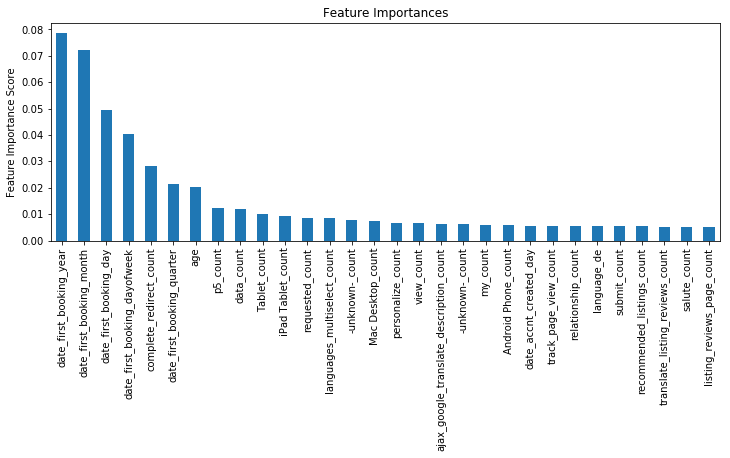

In [471]:
feat_imp_sess = pd.Series(gbm.feature_importances_, x_train_sess.columns).sort_values(ascending=False)
feat_imp_sess[0:30].plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

In [199]:
X_train.columns

Index([u'index', u'age', u'date_accnt_created_month',
       u'timestamp_first_active_month', u'date_first_booking_month',
       u'date_accnt_created_year', u'timestamp_first_active_year',
       u'date_first_booking_year', u'date_accnt_created_day',
       u'timestamp_first_active_day',
       ...
       u'most_used_device_Chromebook', u'most_used_device_Linux Desktop',
       u'most_used_device_Mac Desktop', u'most_used_device_Opera Phone',
       u'most_used_device_Tablet', u'most_used_device_Windows Desktop',
       u'most_used_device_Windows Phone', u'most_used_device_iPad Tablet',
       u'most_used_device_iPhone', u'most_used_device_iPodtouch'],
      dtype='object', length=719)

In [ ]:
train_predict = gbm.predict(x_train)

XGBoost(Without Session)

In [ ]:
from xgboost.sklearn import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import KFold

In [488]:
label_encoder = LabelEncoder()
encoded_y_train = label_encoder.fit_transform(y_train_wo_sess)

In [301]:
label_encoder.inverse_transform(7)

'NDF'

In [274]:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search
import xgboost
from sklearn import preprocessing, model_selection

In [271]:
def modelfit(alg, x_train, y_train,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgboost.DMatrix(x_train, label=y_train)
        cvresult = xgboost.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='mlogloss')
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(x_train, y_train,eval_metric='mlogloss')
        
    #Predict training set:
    dtrain_predictions = alg.predict(x_train)
    dtrain_predprob = alg.predict_proba(x_train)[:,1]
        
    #Print model report:
    print "\nModel Report"
    print "Accuracy : %.4g" % metrics.accuracy_score(y_train, dtrain_predictions)
    print "AUC Score (Train): %f" % metrics.roc_auc_score(y_train, dtrain_predprob)
                    
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

In [262]:
xgboost.DMatrix(x_train_wo_sess, label=encoded_y_train )

In [272]:
xgb1 = XGBClassifier(
    max_depth= 10,
    learning_rate= 0.01,
    n_estimators= 5,
    objective= 'multi:softprob',
    gamma = 0,
    min_child_weight = 1,
    max_delta_step= 0,
    subsample = 1,
    colsample_bytree = 1,
    base_score = 0.5,
    missing = None,
    silent= True,
    nthread= 4,
    seed= 42
)
modelfit(xgb1, x_train_wo_sess,encoded_y_train )

XGBoostError: unknown evaluation metric type: m

In [ ]:
xgtrain = xgb.DMatrix(x_train, label=y_train)

In [ ]:
max_depth=6, learning_rate=0.01, n_estimators=10000,
                    objective='multi:softprob', gamma=1., min_child_weight=1.,
                    max_delta_step=5., subsample=0.7, colsample_bytree=0.7,
                    reg_alpha=0., reg_lambda=1., seed=random_state

In [ ]:
param = {
    'max_depth': 10,
    'learning_rate': 0.1,
    'n_estimators': 5,
    'objective': 'multi:softprob',
    'num_class': 12,
    'gamma': 0,
    'min_child_weight': 1,
    'max_delta_step': 0,
    'subsample': 1,
    'colsample_bytree': 1,
    'colsample_bylevel': 1,
    'reg_alpha': 0,
    'reg_lambda': 1,
    'scale_pos_weight': 1,
    'base_score': 0.5,
    'missing': None,
    'silent': True,
    'nthread': 4,
    'seed': 42
}

kf = KFold(len(x_train), n_folds=10, random_state=42)

score = cross_val_score(xgb, x_train, encoded_y_train,
                        cv=kf, scoring=ndcg_scorer)

print(xgb.get_params(), score.mean())

In [391]:
def runXGB(train_X, train_y, test_X, test_y=None, feature_names=None, seed_val=0, num_rounds=1000):
#     param = {}
#     param['n_estimators']=25
#     param['objective'] = 'multi:softprob'
#     param['eta'] = 0.1
#     param['max_depth'] = 4
#     param['silent'] = 1
#     param['num_class'] = 12
#     param['eval_metric'] = "mlogloss"
#     param['min_child_weight'] = 1
#     param['subsample'] = 0.7
#     param['colsample_bytree'] = 0.7
#     param['seed'] = seed_val
#    num_rounds = num_rounds
    xgb1 = XGBClassifier(
            learning_rate =0.1,
            n_estimators=1000,
            max_depth=5,
            min_child_weight=1,
            gamma=0,
            subsample=0.8,
            colsample_bytree=0.8,
            objective='multi:softprob',
            nthread=4,
            seed=27)

#    plst = list(param.items())
#    xgtrain = xgb.DMatrix(train_X, label=train_y)
    

    if test_y is not None:
#        xgtest = xgb.DMatrix(test_X, label=test_y)
#        watchlist = [ (xgtrain,'train'), (xgtest, 'test') ]
        model = xgb1.fit(train_X, train_Y, early_stopping_rounds=20)
    else:
#        xgtest = xgb.DMatrix(test_X)
        model = xgb1.fit(xgtrain, num_rounds)

    pred_test_y = model.predict_proba(xgtest)
    return pred_test_y, model

In [383]:
print x_train_wo_sess.shape,test_final_wo_sess.shape

(213451, 166) (62096, 166)


In [381]:
from sklearn.utils import compute_sample_weight
from sklearn.metrics import log_loss

In [ ]:
sw = compute_sample_weight(class_weight=cl_weight, y=encoded_y_train)

In [393]:
 xgb2 = XGBClassifier(
            learning_rate =0.1,
            n_estimators=1000,
            max_depth=5,
            min_child_weight=1,
            gamma=0,
            subsample=0.8,
            colsample_bytree=0.8,
            objective='multi:softprob',
            nthread=4,
            seed=27)

In [395]:
cv_scores = []
kf = model_selection.KFold(n_splits=5, shuffle=True, random_state=20)
for dev_index, val_index in kf.split(range(x_train_wo_sess.shape[0])):
        dev_X, val_X = x_train_wo_sess.loc[dev_index], x_train_wo_sess.loc[val_index,:]
        dev_y, val_y = encoded_y_train[dev_index], encoded_y_train[val_index]
        model = xgb2.fit(dev_X,dev_y)
        preds = model.predict_proba(val_X )
        cv_scores.append(log_loss(val_y, preds))
        print(cv_scores)
        break

KeyboardInterrupt: 

In [384]:
preds, model = runXGB(x_train_wo_sess, encoded_y_train, test_final_wo_sess, num_rounds=125)

AttributeError: 'Booster' object has no attribute 'predict_proba'

In [310]:
preds_out=pd.DataFrame(preds)

In [311]:
encoded_y_train

array([ 7,  7, 10, ...,  7,  7,  7])

In [312]:
preds_out[7]

0        0.999944
1        0.999945
2        0.999944
3        0.999943
4        0.999943
5        0.999942
6        0.999940
7        0.999943
8        0.999943
9        0.999938
10       0.999939
11       0.999942
12       0.999941
13       0.999944
14       0.999941
15       0.999941
16       0.999944
17       0.999944
18       0.999943
19       0.999942
20       0.999937
21       0.999940
22       0.999941
23       0.999940
24       0.999941
25       0.999945
26       0.999941
27       0.999933
28       0.999939
29       0.999937
           ...   
62066    0.999942
62067    0.999936
62068    0.999943
62069    0.999939
62070    0.999935
62071    0.999940
62072    0.999942
62073    0.999942
62074    0.999943
62075    0.999933
62076    0.999939
62077    0.999943
62078    0.999939
62079    0.999939
62080    0.999937
62081    0.999941
62082    0.999942
62083    0.999943
62084    0.999940
62085    0.999941
62086    0.999942
62087    0.999935
62088    0.999941
62089    0.999940
62090    0

In [284]:
len(range(x_train_wo_sess.shape[0]))

213451

In [281]:
len(set(x_train_wo_sess.columns))

166

In [291]:
xgb.DMatrix(test_final_wo_sess)

In [282]:
x_train_wo_sess.columns

166

In [286]:
x_train_wo_sess.loc[dev_index]

,age,date_accnt_created_month,timestamp_first_active_month,date_first_booking_month,date_accnt_created_year,timestamp_first_active_year,date_first_booking_year,date_accnt_created_day,timestamp_first_active_day,date_first_booking_day,...,first_browser_Silk,first_browser_SiteKiosk,first_browser_SlimBrowser,first_browser_Sogou Explorer,first_browser_Stainless,first_browser_TenFourFox,first_browser_TheWorld Browser,first_browser_UC Browser,first_browser_Yandex.Browser,first_browser_wOSBrowser
0,-1.0,6,3,-1.0,2010,2009,-1.0,28,19,-1.0,...,0,0,0,0,0,0,0,0,0,0
1,38.0,5,5,-1.0,2011,2009,-1.0,25,23,-1.0,...,0,0,0,0,0,0,0,0,0,0
2,56.0,9,6,8.0,2010,2009,2010.0,28,9,2.0,...,0,0,0,0,0,0,0,0,0,0
3,42.0,12,10,9.0,2011,2009,2012.0,5,31,8.0,...,0,0,0,0,0,0,0,0,0,0
4,41.0,9,12,2.0,2010,2009,2010.0,14,8,18.0,...,0,0,0,0,0,0,0,0,0,0
5,-1.0,1,1,1.0,2010,2010,2010.0,1,1,2.0,...,0,0,0,0,0,0,0,0,0,0
6,46.0,1,1,1.0,2010,2010,2010.0,2,2,5.0,...,0,0,0,0,0,0,0,0,0,0
7,47.0,1,1,1.0,2010,2010,2010.0,3,3,13.0,...,0,0,0,0,0,0,0,0,0,0
8,50.0,1,1,7.0,2010,2010,2010.0,4,4,29.0,...,0,0,0,0,0,0,0,0,0,0
9,46.0,1,1,1.0,2010,2010,2010.0,4,4,4.0,...,0,0,0,0,0,0,0,0,0,0


In [313]:
xgb1 = XGBClassifier(max_depth=6, learning_rate=0.3, n_estimators=25,
                    objective='multi:softprob', subsample=0.5, colsample_bytree=0.5, seed=0)

In [315]:
xgb1.fit(x_train_wo_sess, encoded_y_train)
y_pred = xgb.predict_proba(test_final_wo_sess)

AttributeError: 'module' object has no attribute 'predict_proba'

In [368]:
encoded_y_train

array([ 7,  7, 10, ...,  7,  7,  7])

In [316]:
y_pred = xgb1.predict_proba(test_final_wo_sess)

In [ ]:
xgb1.fe

In [317]:
y_pred

array([[  9.79781471e-05,   6.30472641e-05,   5.52886413e-05, ...,
          5.72797871e-05,   7.10939858e-05,   5.59701439e-05],
       [  9.79770266e-05,   6.30465438e-05,   5.52880083e-05, ...,
          5.72791323e-05,   7.10931781e-05,   5.59695036e-05],
       [  8.51634977e-05,   6.30469949e-05,   5.52884012e-05, ...,
          5.51288686e-05,   7.49543833e-05,   5.59699038e-05],
       ..., 
       [  7.67493475e-05,   6.30470386e-05,   5.66660019e-05, ...,
          5.54542530e-05,   7.36380607e-05,   5.59699438e-05],
       [  8.23503942e-05,   6.30454742e-05,   5.81030363e-05, ...,
          5.54528815e-05,   7.36362417e-05,   6.18379709e-05],
       [  8.23519294e-05,   6.30466457e-05,   5.66656527e-05, ...,
          5.69456788e-05,   7.20889220e-05,   5.96715581e-05]], dtype=float32)

In [320]:
id_test = test['id']

In [374]:
ids = []  #list of ids
cts = []  #list of countries
for i in range(len(id_test)):
    idx = id_test[i]
    ids += [idx] * 5
    cts += label_encoder.inverse_transform(np.argsort(y_pred[i])[::-1])[:5].tolist()


In [400]:
def runXGB(train_X, train_y, test_X, test_y=None, feature_names=None, seed_val=0, num_rounds=1000):
    param = {}
    param['objective'] = 'multi:softprob'
    param['eta'] = 0.1
    param['max_depth'] = 4
    param['silent'] = 1
    param['num_class'] = 12
    param['eval_metric'] = "mlogloss"
    param['min_child_weight'] = 1
    param['subsample'] = 0.7
    param['colsample_bytree'] = 0.7
    param['seed'] = seed_val
    num_rounds = num_rounds

    plst = list(param.items())
    xgtrain = xgb.DMatrix(train_X, label=train_y)

    if test_y is not None:
        xgtest = xgb.DMatrix(test_X, label=test_y)
        watchlist = [ (xgtrain,'train'), (xgtest, 'test') ]
        model = xgb.train(plst, xgtrain, num_rounds, watchlist, early_stopping_rounds=20)
    else:
        xgtest = xgb.DMatrix(test_X)
        model = xgb.train(plst, xgtrain, num_rounds)

    pred_test_y = model.predict(xgtest)
    return pred_test_y, model

In [401]:
cv_scores = []
kf = model_selection.KFold(n_splits=5, shuffle=True, random_state=2017)
for dev_index, val_index in kf.split(range(x_train_wo_sess.shape[0])):
        dev_X, val_X = x_train_wo_sess.loc[dev_index], x_train_wo_sess.loc[val_index,:]
        dev_y, val_y = encoded_y_train[dev_index], encoded_y_train[val_index]
        preds, model = runXGB(dev_X, dev_y, val_X, val_y)
        cv_scores.append(log_loss(val_y, preds))
        print(cv_scores)
        break

Will train until test error hasn't decreased in 20 rounds.
[0]	train-mlogloss:2.033823	test-mlogloss:2.034323
[1]	train-mlogloss:1.771121	test-mlogloss:1.773070
[2]	train-mlogloss:1.584169	test-mlogloss:1.585778
[3]	train-mlogloss:1.435386	test-mlogloss:1.439152
[4]	train-mlogloss:1.316652	test-mlogloss:1.320278
[5]	train-mlogloss:1.216949	test-mlogloss:1.221850
[6]	train-mlogloss:1.134215	test-mlogloss:1.137057
[7]	train-mlogloss:1.059648	test-mlogloss:1.065179
[8]	train-mlogloss:0.997709	test-mlogloss:1.001775
[9]	train-mlogloss:0.942663	test-mlogloss:0.947185
[10]	train-mlogloss:0.892984	test-mlogloss:0.898572
[11]	train-mlogloss:0.851859	test-mlogloss:0.855600
[12]	train-mlogloss:0.813673	test-mlogloss:0.817658
[13]	train-mlogloss:0.777887	test-mlogloss:0.784125
[14]	train-mlogloss:0.747421	test-mlogloss:0.754176
[15]	train-mlogloss:0.720873	test-mlogloss:0.727260
[16]	train-mlogloss:0.696672	test-mlogloss:0.702962
[17]	train-mlogloss:0.675920	test-mlogloss:0.681274
[18]	train-mlog

[0.48161690652377914]


[124]	train-mlogloss:0.459693	test-mlogloss:0.481582
Stopping. Best iteration:
[104]	train-mlogloss:0.462989	test-mlogloss:0.481502



In [ ]:
cv_scores = []
kf = model_selection.KFold(n_splits=5, shuffle=True, random_state=20)
for dev_index, val_index in kf.split(range(x_train_wo_sess.shape[0])):
        dev_X, val_X = x_train_wo_sess.loc[dev_index], x_train_wo_sess.loc[val_index,:]
        dev_y, val_y = encoded_y_train[dev_index], encoded_y_train[val_index]
        model = xgb2.fit(dev_X,dev_y)
        preds = model.predict_proba(val_X )
        cv_scores.append(log_loss(val_y, preds))
        print(cv_scores)
        break

In [414]:
cv_scores.append(log_loss(val_y, preds))

ValueError: Found input variables with inconsistent numbers of samples: [62096, 42691]

In [402]:
preds, model = runXGB(x_train_wo_sess,encoded_y_train,test_final_wo_sess,num_rounds=100)
out_df = pd.DataFrame(preds)


In [411]:
model.get_fscore

<bound method Booster.get_fscore of <xgboost.core.Booster object at 0x136ad4e10>>

In [406]:
preds

array([[  1.94604199e-05,   1.73746084e-05,   1.53329220e-05, ...,
          1.65463171e-05,   2.26114989e-05,   1.77243728e-05],
       [  2.23670777e-05,   1.49397401e-05,   1.53202272e-05, ...,
          1.55678390e-05,   2.29927282e-05,   1.74343058e-05],
       [  1.72361506e-05,   1.47300170e-05,   1.57422764e-05, ...,
          1.56166407e-05,   2.35143580e-05,   1.88215181e-05],
       ..., 
       [  1.77466518e-05,   1.53825767e-05,   1.94846034e-05, ...,
          1.35481996e-05,   2.43533377e-05,   1.86967827e-05],
       [  1.87855239e-05,   1.66652862e-05,   1.73161570e-05, ...,
          1.79892359e-05,   2.35448715e-05,   1.86153520e-05],
       [  2.36366886e-05,   1.76989597e-05,   1.66793925e-05, ...,
          1.34311094e-05,   2.58526743e-05,   2.02195770e-05]], dtype=float32)

In [407]:
ids = []  #list of ids
cts = []  #list of countries
for i in range(len(id_test)):
    idx = id_test[i]
    ids += [idx] * 5
    cts += label_encoder.inverse_transform(np.argsort(preds[i])[::-1])[:5].tolist()

In [409]:
pred_final = pd.DataFrame(np.column_stack((ids, cts)), columns=['id', 'country'])

In [410]:
pred_final.to_csv("xgb_amit.csv", index=False)

In [ ]:
out_df.columns = ["high", "medium", "low"]
out_df["listing_id"] = test_df.listing_id.values
out_df.to_csv("xgb_amit.csv", index=False)

In [ ]:
#train_final_sess--Training
#test_final_sess

In [440]:
x_train_sess = train_final_sess.drop(['country_destination'], axis=1)
y_train_sess = train_final_sess['country_destination']

In [445]:
label_encoder1 = LabelEncoder()
encoded_y_train_sess = label_encoder1.fit_transform(y_train_sess)

In [443]:
x_train_sess.columns

Index([u'age', u'date_accnt_created_month', u'timestamp_first_active_month',
       u'date_first_booking_month', u'date_accnt_created_year',
       u'timestamp_first_active_year', u'date_first_booking_year',
       u'date_accnt_created_day', u'timestamp_first_active_day',
       u'date_first_booking_day',
       ...
       u'most_used_device_Chromebook', u'most_used_device_Linux Desktop',
       u'most_used_device_Mac Desktop', u'most_used_device_Opera Phone',
       u'most_used_device_Tablet', u'most_used_device_Windows Desktop',
       u'most_used_device_Windows Phone', u'most_used_device_iPad Tablet',
       u'most_used_device_iPhone', u'most_used_device_iPodtouch'],
      dtype='object', length=718)

In [446]:
cv_scores = []
kf = model_selection.KFold(n_splits=5, shuffle=True, random_state=2017)
for dev_index, val_index in kf.split(range(x_train_sess.shape[0])):
        dev_X, val_X = x_train_sess.loc[dev_index], x_train_sess.loc[val_index,:]
        dev_y, val_y = encoded_y_train_sess[dev_index], encoded_y_train_sess[val_index]
        preds, model = runXGB(dev_X, dev_y, val_X, val_y)
        cv_scores.append(log_loss(val_y, preds))
        print(cv_scores)
        break

Will train until test error hasn't decreased in 20 rounds.
[0]	train-mlogloss:2.070022	test-mlogloss:2.069161
[1]	train-mlogloss:1.805160	test-mlogloss:1.807370
[2]	train-mlogloss:1.615839	test-mlogloss:1.618630
[3]	train-mlogloss:1.472743	test-mlogloss:1.472702
[4]	train-mlogloss:1.357109	test-mlogloss:1.358185
[5]	train-mlogloss:1.256054	test-mlogloss:1.258298
[6]	train-mlogloss:1.172909	test-mlogloss:1.177028
[7]	train-mlogloss:1.100482	test-mlogloss:1.104056
[8]	train-mlogloss:1.041319	test-mlogloss:1.043470
[9]	train-mlogloss:0.983162	test-mlogloss:0.987749
[10]	train-mlogloss:0.934951	test-mlogloss:0.938849
[11]	train-mlogloss:0.893569	test-mlogloss:0.897674
[12]	train-mlogloss:0.854944	test-mlogloss:0.858571
[13]	train-mlogloss:0.819647	test-mlogloss:0.824468
[14]	train-mlogloss:0.790267	test-mlogloss:0.795235
[15]	train-mlogloss:0.762968	test-mlogloss:0.766946
[16]	train-mlogloss:0.739082	test-mlogloss:0.743858
[17]	train-mlogloss:0.719692	test-mlogloss:0.723916
[18]	train-mlog

[0.48546397006918079]


In [462]:
preds1, model1 = runXGB(x_train_sess,encoded_y_train_sess,test_final_sess,num_rounds=250)
out_df = pd.DataFrame(preds1)

In [463]:
preds1

array([[  1.12716596e-04,   6.75768417e-04,   4.48818988e-04, ...,
          7.35918074e-05,   2.05456931e-02,   4.16654721e-03],
       [  9.68591557e-05,   5.39873086e-04,   3.02495435e-04, ...,
          6.46443004e-05,   1.69127025e-02,   3.34557751e-03],
       [  8.45513714e-05,   6.10057206e-04,   3.71652830e-04, ...,
          9.34760246e-05,   1.72928032e-02,   3.34144826e-03],
       ..., 
       [  1.17853255e-04,   6.31776988e-04,   9.29332920e-04, ...,
          2.43392235e-04,   1.73759144e-02,   3.76377860e-03],
       [  1.36410090e-04,   4.72393003e-04,   6.57128054e-04, ...,
          3.32226569e-04,   1.73319671e-02,   3.76557582e-03],
       [  2.35367785e-04,   7.81683950e-04,   6.54007075e-04, ...,
          1.44316917e-04,   2.23258622e-02,   4.84450161e-03]], dtype=float32)

In [464]:
ids = []  #list of ids
cts = []  #list of countries
for i in range(len(id_test)):
    idx = id_test[i]
    ids += [idx] * 5
    cts += label_encoder1.inverse_transform(np.argsort(preds1[i])[::-1])[:5].tolist()

In [465]:
pred_final = pd.DataFrame(np.column_stack((ids, cts)), columns=['id', 'country'])

In [466]:
pred_final.to_csv("xgb_amit_w_sess.csv", index=False)

# STACKING

In [477]:
import_features = pd.read_csv("data/Feature.csv")

In [478]:
import_features.head()

,Unnamed: 0,Feature,Importance
0,date_first_booking_year,date_first_booking_year,0.073207
1,date_first_booking_day,date_first_booking_day,0.065000
2,date_first_booking_dayofweek,date_first_booking_dayofweek,0.063739
3,age,age,0.058238
4,timestamp_first_active_day,timestamp_first_active_day,0.057404


In [ ]:
train_final_sess

In [72]:
from sklearn.ensemble import RandomForestClassifier
rndm = RandomForestClassifier(min_samples_leaf =5,class_weight = 'balanced', random_state = 20, max_depth = 100)

In [73]:
from sklearn.ensemble import AdaBoostClassifier
adboost = AdaBoostClassifier(n_estimators=25, learning_rate=.8,random_state = 20)

In [74]:
from xgboost.sklearn import XGBClassifier
xbgstack = XGBClassifier(max_depth=4, learning_rate=0.3, n_estimators=25,
                    objective='multi:softprob', subsample=0.7, colsample_bytree=0.7, seed=1)

In [75]:
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier(random_state=10)


In [76]:
from mlxtend.classifier import StackingClassifier
sclf = StackingClassifier(classifiers=[rndm, adboost,gbm], 
                          meta_classifier= xbgstack)

In [ ]:
x_train_wo_sess_imp=x_train_wo_sess[import_features[import_features.Importance > 0]['Feature'].tolist()]

In [528]:
import itertools


for clf, lab, grd in zip([rndm, adboost,gbm,sclf], 
                         ['Random Forest', 
                          'Ada Boost',
                          'Gradient Boosting Model',
                          'Stacking Classifier'],
                          itertools.product([0, 1], repeat=2)):
    clf.fit(x_train_wo_sess_imp, encoded_y_train)


In [531]:
test_final_sess_imp=test_final_sess[import_features[import_features.Importance > 0]['Feature'].tolist()]

(62096, 166)

In [533]:
pred1_stck = clf.predict_proba(test_final_sess_imp)

In [535]:
ids = []  #list of ids
cts = []  #list of countries
for i in range(len(id_test)):
    idx = id_test[i]
    ids += [idx] * 5
    cts += label_encoder1.inverse_transform(np.argsort(pred1_stck[i])[::-1])[:5].tolist()

In [536]:
pred_final_stk = pd.DataFrame(np.column_stack((ids, cts)), columns=['id', 'country'])

In [538]:
pred_final_stk.to_csv("stack_amit_w_sess.csv", index=False)

# Voting Classifier

In [70]:
from sklearn.ensemble import VotingClassifier

In [77]:
eclf1 = VotingClassifier(estimators=[
    ('rnd', rndm), ('ada', adboost), ('gbm', gbm), ('xgb',xbgstack)], voting='soft')

In [80]:
from sklearn.preprocessing import LabelEncoder
label_encoder_vtng = LabelEncoder()
y_train_sess_vt = label_encoder_vtng.fit_transform(y_train_sess)

In [82]:
eclf1 = eclf1.fit(x_train_sess, y_train_sess_vt)

In [83]:
vtng_class_pred = eclf1.predict_proba(test_final_sess)

In [88]:
id_test = test['id']

In [89]:
ids = []  #list of ids
cts = []  #list of countries
for i in range(len(id_test)):
    idx = id_test[i]
    ids += [idx] * 5
    cts += label_encoder_vtng.inverse_transform(np.argsort(vtng_class_pred[i])[::-1])[:5].tolist()

In [90]:
pred_final_vtng = pd.DataFrame(np.column_stack((ids, cts)), columns=['id', 'country'])

In [91]:
pred_final_vtng.to_csv("vtng_amit_w_sess.csv", index=False)

In [98]:
(np.argsort(vtng_class_pred[1])[::-1])[:5].tolist()

[0, 8, 11, 7, 5]

In [97]:
set(y_train_sess_vt)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

In [99]:
label_encoder_vtng.inverse_transform(0)

-1

In [103]:
y_train_sess.shape

(275547,)

In [496]:
x_train_wo_sess_imp = x_train_wo_sess[import_features.Feature.tolist()]

In [527]:
y_train_wo_sess

0           NDF
1           NDF
2            US
3         other
4            US
5            US
6            US
7            US
8            US
9            US
10           US
11          NDF
12           FR
13          NDF
14          NDF
15           CA
16          NDF
17           US
18          NDF
19           FR
20           US
21           US
22           US
23          NDF
24          NDF
25           FR
26          NDF
27           US
28           FR
29           US
          ...  
213421      NDF
213422      NDF
213423      NDF
213424      NDF
213425      NDF
213426      NDF
213427      NDF
213428      NDF
213429      NDF
213430      NDF
213431      NDF
213432      NDF
213433      NDF
213434      NDF
213435      NDF
213436      NDF
213437      NDF
213438      NDF
213439       US
213440      NDF
213441       ES
213442      NDF
213443       US
213444      NDF
213445       US
213446      NDF
213447      NDF
213448      NDF
213449      NDF
213450      NDF
Name: country_destinatio

In [500]:
x_train_wo_sess_imp=x_train_wo_sess_imp.fillna(-1)

In [504]:
import_features

,Unnamed: 0,Feature,Importance
0,date_first_booking_year,date_first_booking_year,7.320709e-02
1,date_first_booking_day,date_first_booking_day,6.500018e-02
2,date_first_booking_dayofweek,date_first_booking_dayofweek,6.373908e-02
3,age,age,5.823781e-02
4,timestamp_first_active_day,timestamp_first_active_day,5.740415e-02
5,date_accnt_created_day,date_accnt_created_day,5.718856e-02
6,timestamp_first_active_dayofweek,timestamp_first_active_dayofweek,4.889437e-02
7,date_accnt_created_dayofweek,date_accnt_created_dayofweek,4.817646e-02
8,date_first_booking_month,date_first_booking_month,4.399646e-02
9,date_first_booking_quarter,date_first_booking_quarter,4.258762e-02


In [540]:
from sklearn.neural_network import BernoulliRBM

In [541]:
rbm = BernoulliRBM(n_components=256, learning_rate=0.1, batch_size=10, n_iter=10, verbose=0, random_state=None)

In [542]:
from sklearn.preprocessing import LabelEncoder
label_encoder_rbm = LabelEncoder()
y_train_sess = label_encoder.fit_transform(y_train_sess)

In [543]:
rbm.fit(x_train_sess,encoded_y_train_sess)

BernoulliRBM(batch_size=10, learning_rate=0.1, n_components=256, n_iter=10,
       random_state=None, verbose=0)

In [544]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [546]:
logistic = LogisticRegression()

In [548]:
classifier = Pipeline(steps=[('rbm', rbm), ('logistic', logistic)])

In [550]:
rbm.learning_rate = 0.06
rbm.n_iter = 20
# More components tend to give better prediction performance, but larger
# fitting time
rbm.n_components = 100
logistic.C = 6000.0

# Training RBM-Logistic Pipeline
classifier.fit(x_train_sess,encoded_y_train_sess)

# Training Logistic regression
logistic_classifier = linear_model.LogisticRegression(C=100.0)
logistic_classifier.fit(x_train_sess,encoded_y_train_sess)

NameError: name 'linear_model' is not defined

In [551]:
logistic_classifier = LogisticRegression(C=100.0)
logistic_classifier.fit(x_train_sess,encoded_y_train_sess)

LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [553]:
pred_neural=classifier.predict_proba(test_final_sess)

In [555]:
pred_final_neu = pd.DataFrame(np.column_stack((ids, cts)), columns=['id', 'country'])

In [557]:
pred_final_neu.to_csv("neu_amit_w_sess.csv", index=False)

In [ ]:
ids_t = []  #list of ids
cts = []  #list of countries
for i in range(len(id_test)):
    idx = id_test[i]
    ids_t += [idx] * 5
    cts += label_encoder_vtng.inverse_transform(np.argsort(vtng_class_pred[i])[::-1])[:5].tolist()

In [114]:
ids_t=[]
idx=id_test[0]

In [115]:
ids_t = ids_t +([idx] * 5) 

In [116]:
ids_t

['5uwns89zht', '5uwns89zht', '5uwns89zht', '5uwns89zht', '5uwns89zht']